# M7 T01  Algoritmes d’aprenentatge supervisat: Classificació

Variables i tècniques de Classificació (Arbres de classificació, K – Nearest Neightbours, Regressió Logística, Support Vector Machine, XGBoost).  
Avaluar models de classificació.   

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.linear_model import LinearRegression


from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, plot_confusion_matrix
from sklearn.metrics import precision_score, f1_score, classification_report, balanced_accuracy_score, roc_auc_score


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


### DESCRIPCIÓ DEL DATASET

In [2]:
#importem i obrim archiu .txt
archiu = open('./dataset/wineNames.txt', mode='r')
data_description = archiu.read()
print(data_description)

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [111]:
#importem el dataset i definim les columnes

colnames=['Class_id', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
          'Proanthocyanins', 'Color', 'Hue', 'Diluted', 'Proline']
df = pd.read_csv('./dataset/wineData.txt', delimiter=",", decimal=".", encoding ='utf8', names=colnames, header=None)
df.sample(5)

,Class_id,Alcohol,Malic_acid,Ash,Alcalinity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color,Hue,Diluted,Proline
96,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625
71,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
21,1,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770
66,2,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295


### Data Exploring

In [4]:
df.shape

(178, 14)

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class_id,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [112]:
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.int32)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class_id              178 non-null    int32  
 1   Alcohol               178 non-null    float32
 2   Malic_acid            178 non-null    float32
 3   Ash                   178 non-null    float32
 4   Alcalinity_ash        178 non-null    float32
 5   Magnesium             178 non-null    int32  
 6   Total_phenols         178 non-null    float32
 7   Flavanoids            178 non-null    float32
 8   Nonflavanoid_phenols  178 non-null    float32
 9   Proanthocyanins       178 non-null    float32
 10  Color                 178 non-null    float32
 11  Hue                   178 non-null    float32
 12  Diluted               178 non-null    float32
 13  Proline               178 non-null    int32  
dtypes: float32(11), int32(3)
memory usage: 9.9 KB


In [5]:
df.isna().sum().sort_values()

Class_id                0
Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_ash          0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color                   0
Hue                     0
Diluted                 0
Proline                 0
dtype: int64

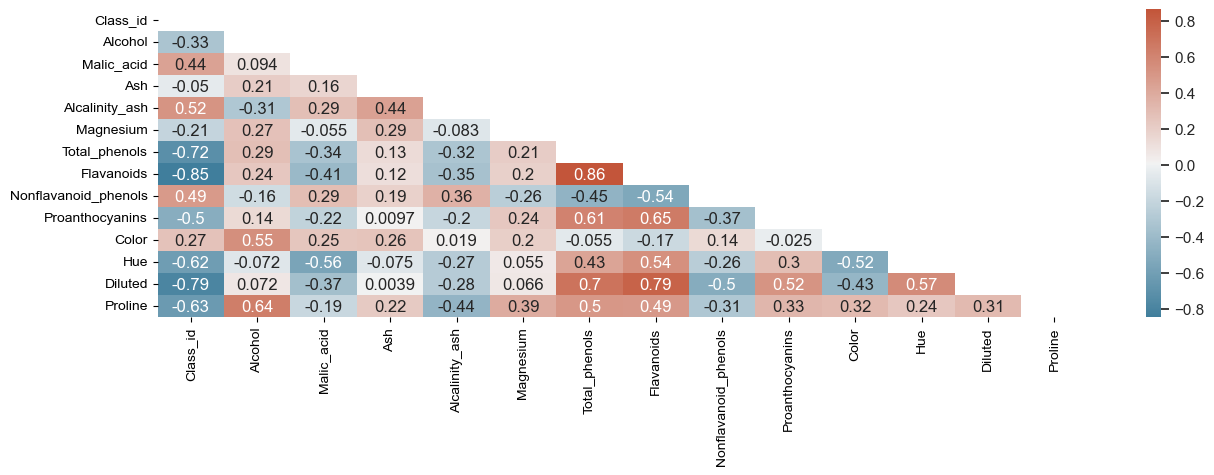

In [6]:
#Heatmap matriu de correlació

fig,ax = plt.subplots(figsize=(15,4))
corr = df.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

matx = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matx, cmap=cmap)
plt.show()

In [7]:
df['Class_id'].value_counts()

2    71
1    59
3    48
Name: Class_id, dtype: int64

<AxesSubplot:xlabel='Class_id', ylabel='count'>

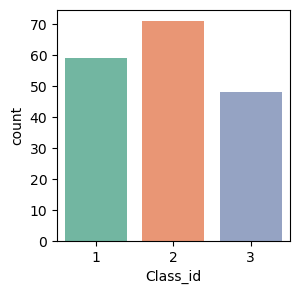

In [19]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.countplot(data=df, x="Class_id", palette="Set2")

In [5]:
X_col = df.drop('Class_id', axis=1).columns
Y_col = df[['Class_id']]

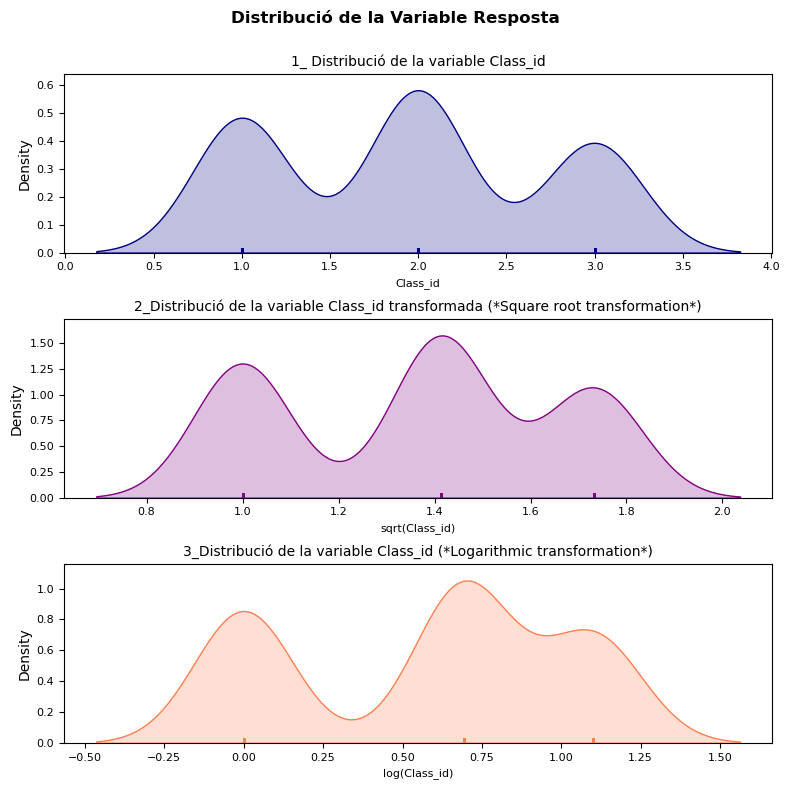

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))
sns.distplot(
    Y_col,
    hist    = False,
    rug     = True,
    color   = "navy",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("1_ Distribució de la variable Class_id", fontsize = 10)
axes[0].set_xlabel('Class_id', fontsize=8) 
axes[0].tick_params(labelsize = 8)

sns.distplot(
    np.sqrt(Y_col),
    hist    = False,
    rug     = True,
    color   = "purple",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("2_Distribució de la variable Class_id transformada (*Square root transformation*)", fontsize = 10)
axes[1].set_xlabel('sqrt(Class_id)', fontsize=8) 
axes[1].tick_params(labelsize = 8)

sns.distplot(
    np.log(Y_col),
    hist    = False,
    rug     = True,
    color   = "coral",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("3_Distribució de la variable Class_id (*Logarithmic transformation*)", fontsize = 10)
axes[2].set_xlabel('log(Class_id)', fontsize=8) 
axes[2].tick_params(labelsize = 8)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribució de la Variable Resposta', fontsize = 12, fontweight = "bold");

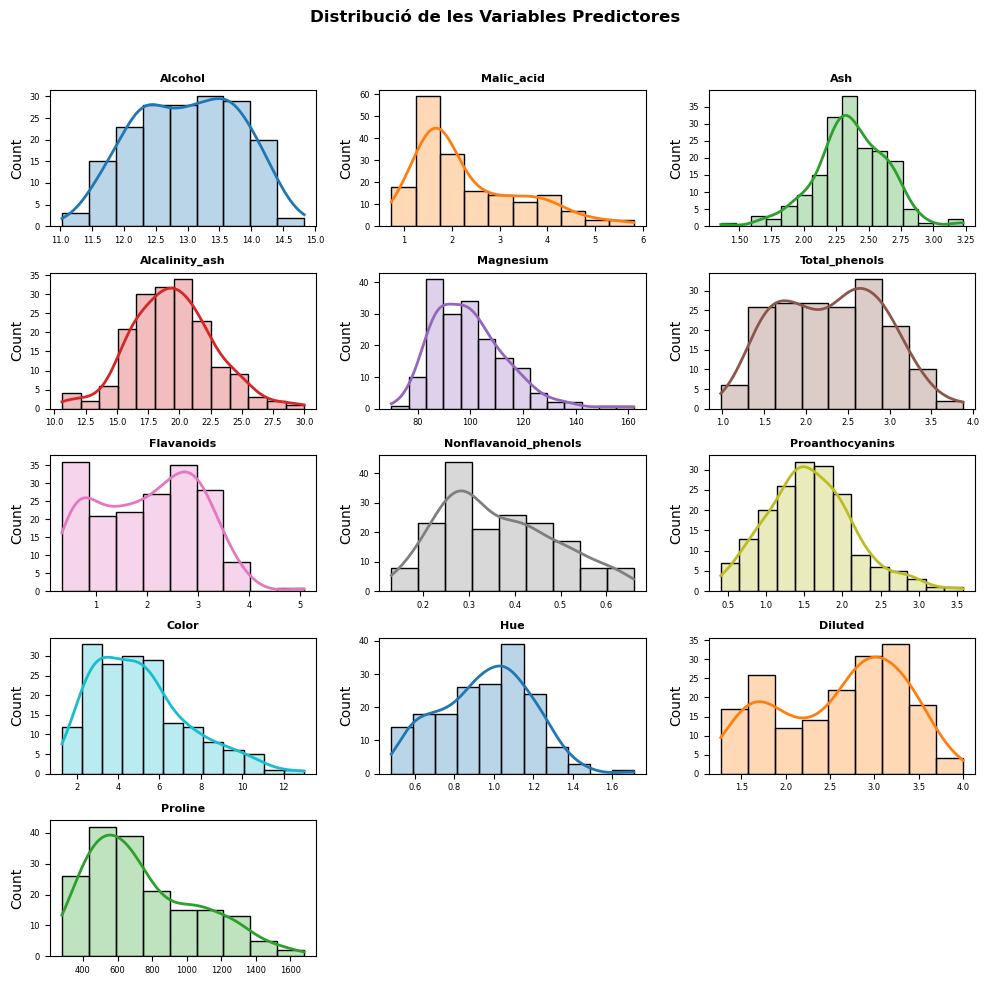

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))
axes = axes.flat

for i, colum in enumerate(X_col):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
# Se eliminem els axes buits
for i in [13, 14]:
    fig.delaxes(axes[i])
     
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribució de les Variables Predictores', fontsize = 12, fontweight = "bold");


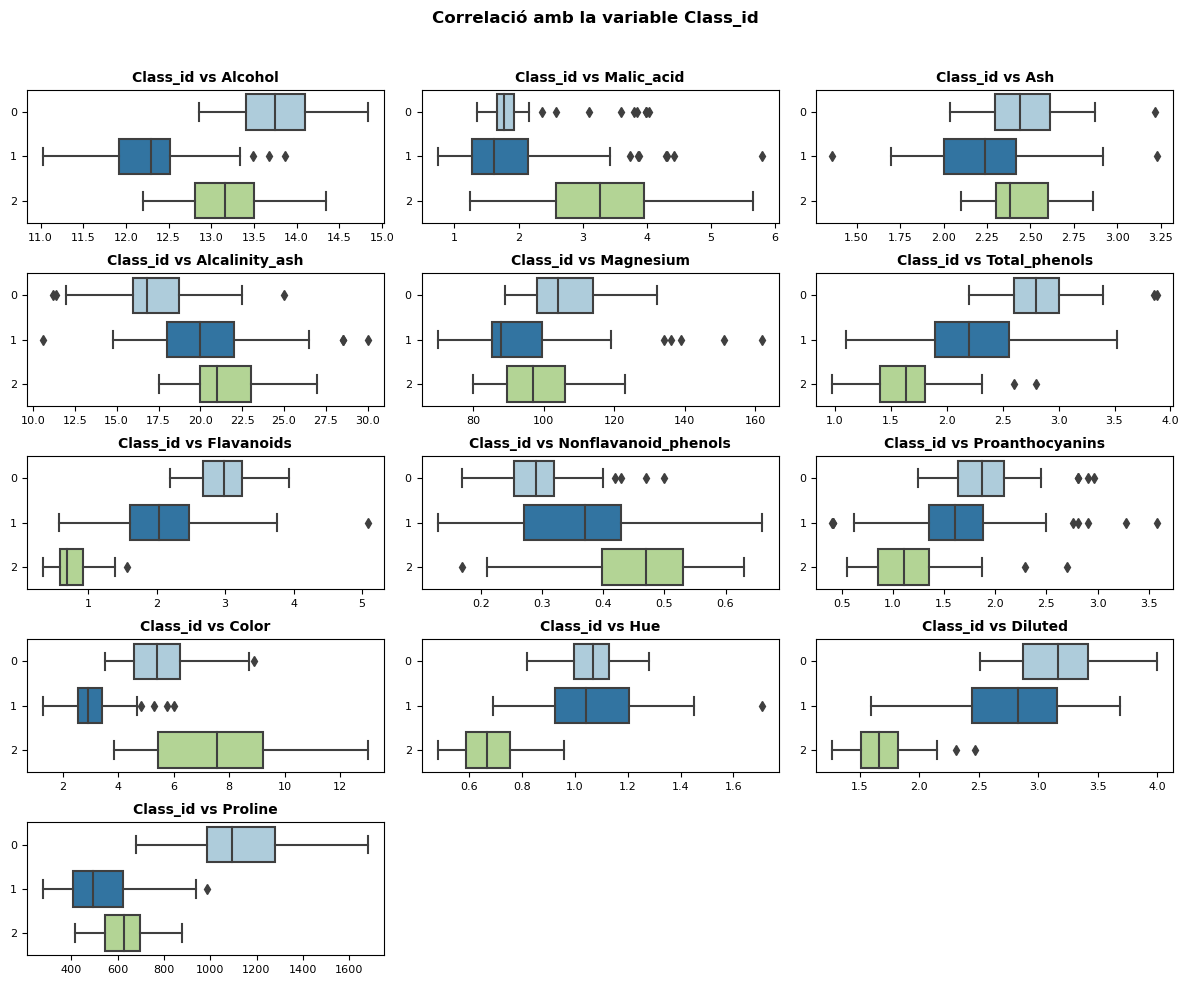

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 10))
axes = axes.flat

for i,colum in enumerate(X_col):
    sns.boxplot(
        data    = df,
        x       = df[colum],
        y       = df["Class_id"],
        orient  = 'h',
        #color   ='skyblue',
        palette ="Paired",
        ax      = axes[i]
    ) 
    
    axes[i].set_title(f"Class_id vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter()) 
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("", fontsize=8)
    axes[i].set_ylabel("", fontsize=8)


for i in [13, 14]:
    fig.delaxes(axes[i])
    
fig.tight_layout()    
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlació amb la variable Class_id', fontsize = 12, fontweight = "bold");

### Data Prepocessing in ML

In [113]:
#Devidim el conjunt de dades en 2 grups: el 70% per training i el 30% per testing grup

#El paràmetre stratify conserva la proporció de com es distribueixen les dades a la columna de destí (Class_id), 
#i representa aquesta mateixa proporció a train_test_split

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('Class_id', axis='columns'),
                                        df['Class_id'],
                                        test_size=0.3,
                                        shuffle = True, 
                                        stratify = df['Class_id'],
                                        random_state = 42
                                        )

In [114]:
#Comprovem les particions

print("TRAIN Dataset")
print("_________")
print("Features: ", X_train.shape, "Target: ", y_train.shape)
print(y_train.describe().T)
print("\n")
print("TEST Dataset")
print("_________")
print("Features: ", X_test.shape, "Target: ",y_test.shape)
print(y_test.describe().T)

TRAIN Dataset
_________
Features:  (124, 13) Target:  (124,)
count    124.000000
mean       1.935484
std        0.772936
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Class_id, dtype: float64


TEST Dataset
_________
Features:  (54, 13) Target:  (54,)
count    54.000000
mean      1.944444
std       0.787081
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Class_id, dtype: float64


In [115]:
#La classe StandardScaler estandaritza les dades, aproxima la mitja a "0" y escala les dedes de forma que 
#la variança sigui igual a 1

from sklearn.preprocessing import StandardScaler

X_list = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
          'Proanthocyanins', 'Color', 'Hue', 'Diluted', 'Proline'] 

scaler= StandardScaler()
X_train_transf = scaler.fit_transform(X_train)
X_train_transf = pd.DataFrame(X_train_transf, columns = X_list)

X_test_transf = scaler.transform(X_test)
X_test_transf = pd.DataFrame(X_test_transf, columns = X_list)

In [116]:
X_train_transf.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,124.0,2.972533e-16,1.004057,-2.383217,-0.746670,0.023651,0.753756,2.319148
Malic_acid,124.0,1.235571e-16,1.004057,-1.465430,-0.641312,-0.456596,0.703801,3.327718
Ash,124.0,7.789468e-16,1.004057,-3.743645,-0.609850,-0.012938,0.733204,3.195472
Alcalinity_ash,124.0,1.548940e-16,1.004057,-2.688377,-0.731802,0.098259,0.542935,3.062765
Magnesium,124.0,-3.664359e-16,1.004057,-1.979940,-0.793570,-0.167431,0.524618,4.083725
Total_phenols,124.0,-2.583059e-16,1.004057,-2.102437,-0.925579,0.187234,0.811689,2.540951
Flavanoids,124.0,1.736962e-16,1.004057,-1.752470,-0.803752,0.155478,0.815112,1.821646
Nonflavanoid_phenols,124.0,-3.581365e-18,1.004057,-1.960642,-0.703274,-0.170491,0.596717,2.301623
Proanthocyanins,124.0,1.217664e-16,1.004057,-2.056322,-0.616715,-0.070358,0.597412,3.424593
Color,124.0,1.472836e-16,1.004057,-1.566215,-0.825122,-0.149388,0.513695,3.375811


Exercicis d'algoritmes de Classificació

## Exercici 1

Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

### Models de classificació

Tipus d'algoritme de Classificació:

#### Linear Classifiers 
* Logistic regression
* Naive Bayes classifier
* Fisher’s linear discriminant

#### Support Vector Machines (SVM)
* Least squares support vector machines

#### Quadratic classifiers

#### Kernel estimation
* k-nearest neighbor 

#### Decision trees
* Random forests
* XGboost

#### Neural networks

#### Learning vector quantization



### Lazy Classifier

LazyPredict ens permet llançar diferents models de scikit-Learn amb els paràmetres per defecte per a comprovar el rendiment de cadascun d'ells en el nostre dataset i enfocar-nos a optimitzar aquells que millor s'ajusten.


[Lazy Classifier](https://lazypredict.readthedocs.io/en/latest/)

In [39]:
#help
LazyClassifier?

In [11]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [38]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.43it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,1.00,1.00,None,1.00,0.19
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.01
ExtraTreesClassifier,1.00,1.00,None,1.00,0.11
GaussianNB,1.00,1.00,None,1.00,0.01
LinearSVC,0.98,0.98,None,0.98,0.01
BaggingClassifier,0.98,0.98,None,0.98,0.03
RidgeClassifierCV,0.98,0.98,None,0.98,0.01
RidgeClassifier,0.98,0.98,None,0.98,0.01
PassiveAggressiveClassifier,0.98,0.98,None,0.98,0.02


### M1_Model de Regressió Logística

In [117]:
from sklearn.linear_model import LogisticRegression

regLG = LogisticRegression()
regLG.fit(X_train_transf, y_train)

LogisticRegression()

In [118]:
pred_regLG = regLG.predict(X_test_transf)

In [119]:
proba_regLG = regLG.predict_proba(X_test_transf)

In [120]:
comp_regLG = pd.DataFrame({'Actual':y_test,
                           'Predicció':pred_regLG })
comp_regLG.sample(5)

,Actual,Predicció
166,3,3
112,2,2
22,1,1
130,3,3
20,1,1


### M2_Model de KNN-nearest neighbor

In [121]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_transf, y_train)

KNeighborsClassifier()

In [122]:
pred_knn = knn.predict(X_test_transf)

In [123]:
proba_knn = knn.predict_proba(X_test_transf)

In [124]:
comp_knn = pd.DataFrame({'Actual':y_test,
                           'Predicció':pred_knn })
comp_knn.sample(5)

,Actual,Predicció
134,3,3
112,2,3
21,1,1
7,1,1
176,3,3


### M3_Random Forest Classifier

In [125]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

randFC = RandomForestClassifier()
randFC.fit(X_train_transf, y_train)

RandomForestClassifier()

In [126]:
pred_randFC = randFC.predict(X_test_transf)

In [127]:
proba_randFC = randFC.predict_proba(X_test_transf)

In [128]:
comp_randFC = pd.DataFrame({'Actual':y_test,
                            'Predicció':pred_randFC })
comp_randFC.sample(5)

,Actual,Predicció
93,2,2
112,2,2
21,1,1
108,2,2
177,3,3


### M4_GBClassifier

In [129]:
from sklearn.ensemble import GradientBoostingClassifier 

gb = GradientBoostingClassifier()
gb.fit(X_train_transf,y_train)

GradientBoostingClassifier()

In [130]:
pred_gb = gb.predict(X_test_transf)

In [131]:
proba_gb = gb.predict_proba(X_test_transf)

In [132]:
comp_gb = pd.DataFrame({'Actual':y_test,
                        'Predicció':pred_gb })
comp_gb.sample(5)

,Actual,Predicció
21,1,2
10,1,1
2,1,1
173,3,3
14,1,1


### M5_Quadratic Discriminant Analysis (QDA)

In [138]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train_transf, y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [139]:
pred_qda = qda.predict(X_test_transf)

In [140]:
proba_qda = qda.predict_proba(X_test_transf)

In [141]:
comp_qda = pd.DataFrame({'Actual':y_test,
                           'Predicció':pred_qda })
comp_qda.sample(5)

,Actual,Predicció
164,3,3
60,2,2
94,2,2
35,1,1
176,3,3


## Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

La matriu de confusió ens permet analitzar els resultats de certesa de la predicció. 

Possibles resultats:

* Verdader positiu: El valor real és positiu i la prova ho va predir correctament.
* Verdader negatiu: El valor real és negatiu i la prova va predir que el resultat era negatiu. 
* Fals negatiu: El valor real és positiu, i la prova va predir que el resultat seria negatiu. Aquest error es coneix com a error de tipus II
* Fals positiu: El valor real és negatiu, i la prova va predir que el resultat seria positiu. Error que en estadística es coneix com a error de tipus I

##### MÉTRIQUES

**Accuracy**
<br>
En térmes estadístics, la exactitut està relacionada am el biaix de l'estimació. Es representa com  la proporció de resultats verdaders (tant verdaders positivos (VP) com verdaders negatius (VN)) dividit entre el número total de casos examinats (verdaders positius, falsos positius, verdaders negatius, falsos negatius)

Podriem dir que, la Exactitut es  la cantitat de prediccions positives que van ser correctes.

(VP+VN)/(VP+FP+FN+VN)

<br>

**Precision**

<br>
Es refereix a la dispersió del conjunt de valors obtinguts a partir de les medicions repetides d'una magnitud. Quan menor es la dispersió major la precisió. Es representa per la proporció de verdaders positius dividit entre tots els resultats positius (tant verdaders positius, como falsos positius).

Diem que es  el porcentatge de casos positius detectats.

VP/(VP+FP)

<br>

**Bias o Inaccuracy**

<br>
És la diferencia entre el valor mig i el verdader valor de la magnitud meurada. El biaix pertany al concepte d'exactitut.

<br>

**Recall o sensitivity** i **Especificity**

<br>
La sensibilitat i l'especificitat són dos valors que ens indiquen la capacitat del nostre estimador per a discriminar els casos positius, dels negatius. La sensibilitat es representa com la fracció de verdaders positius, mentre que l'especificitat, és la fracció de verdaders negatius.

<br>

__Recall  o sensitivit__

<br>
També es coneix com a Taxa de Verdaders Positius (*True *Positive *Rate) o *TP. És la proporció de casos positius que van ser correctament identificats per l'algorisme.

*VP/(*VP+*FN)

<br>

__Especificity__

<br>
També coneguda com la Taxa de Verdaders Negatius, (“*true *negative *rate”) o *TN. Es tracta dels casos negatius que l'algorisme ha classificat correctament. Expressa lo correcte del model en detectar aquesta classe.

VN/(VN+FP)

<br>
Per mesurar quantitativament la precisió de les proves:

La taxa de falsos positius es calcula com:

FP / FP + TN

on FP és el nombre de falsos positius i *TN és el nombre de verdaders negatius (FP + *TN és el nombre total de negatius). És la probabilitat que es produeixi una falsa alarma: que es doni un resultat positiu quan el valor correcte sigui negatiu.

A continuació, es mostra un breu resum dels més comuns:

1.) La taxa de falsos negatius, també anomenada taxa d'error, és la probabilitat que la prova passi per alt un verdader positiu. Es calcula com:

FN / FN + VP 
on *FN és el nombre de falsos negatius i *VP és el nombre de veritables positius

2.) La taxa de verdaders positius (*TVP, també anomenada sensibilitat) es calcula com: 

VP / VP + FN

La taxa de verdaders positius és la probabilitat que un resultat positiu real doni positiu.

3.) La taxa de verdaders negatius (també anomenada especificitat) és la probabilitat que un resultat negatiu real doni un resultat negatiu. Es calcula com:

VN / VN + FP

a.) El valor predictiu positiu és la probabilitat que, si ha obtingut un resultat positiu en la prova, realment sigui un encert. Es calcula com:

VP / VP + FP.

b.) El valor predictiu negatiu, per contra és la probabilitat que, si ha obtingut un resultat negatiu en la prova, en realitat no sigui el valor real.

<br>

**F1 SCORE**

<br>
Aquesta mètrica ens resumeix la precisió i sensibilitat. És útil quan la distribució de les classes és desigual.

F1-Score = (2xPrexisióxSensibilitat) / Prexisió + Sensibilitat

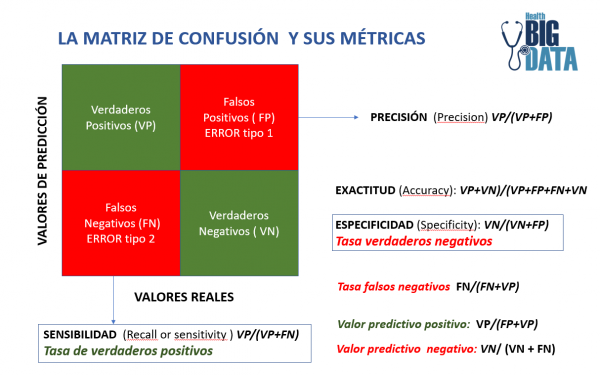

In [17]:
X = X_test
y = y_test

### M1_Model de Regressió Logística

In [109]:
print(f'Accuracy: {accuracy_score(y_test, pred_regLG)}')
print(f'B-Accuracy: {balanced_accuracy_score(y_test, pred_regLG)}')
print(f'ROC AUC: {roc_auc_score(y_test, proba_regLG, multi_class="ovr")}')

print("\n", classification_report(y_test, pred_regLG))

print(f'\nCross Validation Scores: {cross_val_score(regLG, X, y, cv=5)}')

Accuracy: 0.9814814814814815
B-Accuracy: 0.9841269841269842
ROC AUC: 0.9995189995189996

               precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Cross Validation Scores: [0.90909091 1.         0.81818182 1.         1.        ]


C:\Users\Usuari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usuari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

#### Matriu de confusió

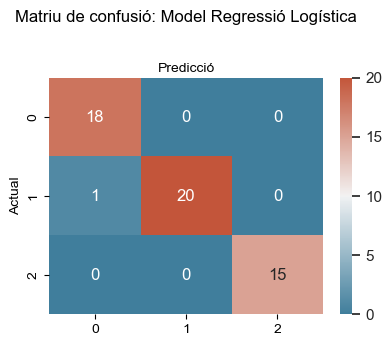

In [81]:
mx_regLG = pd.DataFrame(metrics.confusion_matrix(y_test, pred_regLG))

#Grafiquem

fig,ax = plt.subplots(figsize=(4,3))
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(mx_regLG, annot=True, cmap=cmap, fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriu de confusió: Model Regressió Logística", y = 1.2)
plt.ylabel("Actual")
plt.xlabel("Predicció")

plt.show();

### M2_Model de KNN-nearest neighbor

In [35]:
print(f'Accuracy: {accuracy_score(y_test, pred_knn)}')
print(f'B-Accuracy: {balanced_accuracy_score(y_test, pred_knn)}')
print(f'ROC AUC: {roc_auc_score(y_test, proba_knn, multi_class="ovr")}')

print("\n", classification_report(y_test, pred_knn))

print(f'\nCross Validation Scores: {cross_val_score(knn, X, y)}')

Accuracy: 0.9444444444444444
B-Accuracy: 0.9523809523809524
ROC AUC: 0.9953157953157953

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      0.86      0.92        21
           3       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


Cross Validation Scores: [0.81818182 0.72727273 0.45454545 0.54545455 0.9       ]


#### Matriu de confusió

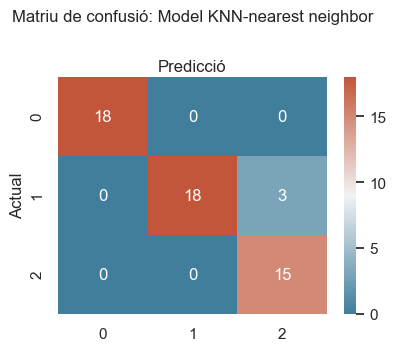

In [210]:
mx_knn = pd.DataFrame(metrics.confusion_matrix(y_test, pred_knn))

#Grafiquem

fig,ax = plt.subplots(figsize=(4,3))
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(mx_knn, annot=True, cmap=cmap, fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriu de confusió: Model KNN-nearest neighbor", y = 1.2)
plt.ylabel("Actual")
plt.xlabel("Predicció")

plt.show();

### M3_Random Forest Classifier

In [18]:
print(f'Accuracy: {accuracy_score(y_test, pred_randFC)}')
print(f'B-Accuracy: {balanced_accuracy_score(y_test, pred_randFC)}')
print(f'ROC AUC: {roc_auc_score(y_test, proba_randFC, multi_class="ovr")}')

print("\n", classification_report(y_test, pred_randFC))

print(f'\nCross Validation Scores: {cross_val_score(randFC, X, y)}')

Accuracy: 1.0
B-Accuracy: 1.0
ROC AUC: 1.0

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Cross Validation Scores: [1. 1. 1. 1. 1.]


#### Matriu de confusió

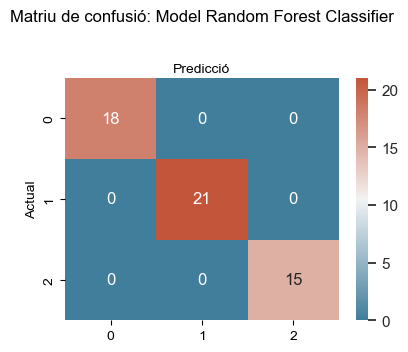

In [19]:
mx_randFC = pd.DataFrame(metrics.confusion_matrix(y_test, pred_randFC))

#Grafiquem

fig,ax = plt.subplots(figsize=(4,3))
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(mx_randFC, annot=True, cmap=cmap, fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriu de confusió: Model Random Forest Classifier", y = 1.2)
plt.ylabel("Actual")
plt.xlabel("Predicció")

plt.show();

### M4_GBClassifier

In [20]:
print(f'Accuracy: {accuracy_score(y_test, pred_gb)}')
print(f'B-Accuracy: {balanced_accuracy_score(y_test, pred_gb)}')
print(f'ROC AUC: {roc_auc_score(y_test, proba_gb, multi_class="ovr")}')

print("\n", classification_report(y_test, pred_gb ))

print(f'\nCross Validation Scores: {cross_val_score(gb, X, y)}')

Accuracy: 0.9629629629629629
B-Accuracy: 0.9629629629629629
ROC AUC: 0.9984901929346374

               precision    recall  f1-score   support

           1       1.00      0.89      0.94        18
           2       0.91      1.00      0.95        21
           3       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54


Cross Validation Scores: [0.90909091 1.         0.72727273 1.         0.9       ]


#### Matriu de confusió

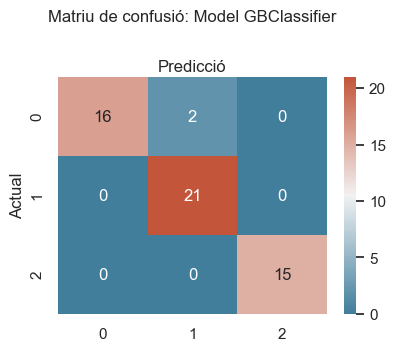

In [21]:
mx_gb = pd.DataFrame(metrics.confusion_matrix(y_test, pred_gb))

#Grafiquem

fig,ax = plt.subplots(figsize=(4,3))
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(mx_gb, annot=True, cmap=cmap, fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriu de confusió: Model GBClassifier", y = 1.2)
plt.ylabel("Actual")
plt.xlabel("Predicció")

plt.show();

### M5_Quadratic Discriminant Analysis (QDA)

In [144]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, plot_confusion_matrix
from sklearn.metrics import precision_score, f1_score, classification_report, balanced_accuracy_score, roc_auc_score

print(f'Accuracy: {accuracy_score(y_test, pred_qda)}')
print(f'B-Accuracy: {balanced_accuracy_score(y_test, pred_qda)}')
print(f'ROC AUC: {roc_auc_score(y_test, proba_qda, multi_class="ovr")}')

print("\n", classification_report(y_test, pred_qda ))

print(f'\nCross Validation Scores: {cross_val_score(qda, X, y)}')

Accuracy: 1.0
B-Accuracy: 1.0
ROC AUC: 1.0

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Cross Validation Scores: [0.36363636 0.72727273 0.63636364 0.54545455 0.6       ]


C:\Users\Usuari\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Usuari\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Usuari\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Usuari\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Usuari\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


#### Matriu de confusió

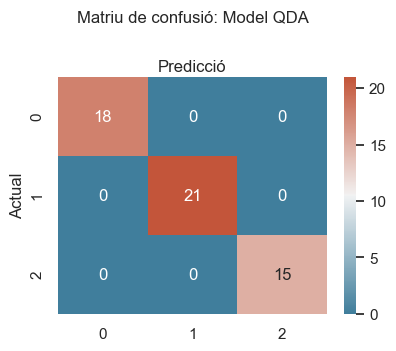

In [212]:
mx_qda = pd.DataFrame(metrics.confusion_matrix(y_test, pred_qda))

#Grafiquem

fig,ax = plt.subplots(figsize=(4,3))
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(mx_qda, annot=True, cmap=cmap, fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriu de confusió: Model QDA", y = 1.2)
plt.ylabel("Actual")
plt.xlabel("Predicció")

plt.show();

## Exercici 3

Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

### M1_Model de Regressió Logística

In [97]:
#help
LogisticRegression?

In [24]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_lreg = {'solver' : ['liblinear', 'newton-cg'],
                'penalty': [ 'l2'],
                'C'      : [0.001,0.01,0.1,1,10,100,1000]
               }


lreg = GridSearchCV(
            estimator  = LogisticRegression(random_state = 12),
            param_grid = param_lreg,
            scoring    = 'accuracy',
            n_jobs     = 5,
            cv         = RepeatedKFold(n_splits = 5, n_repeats =5),
            return_train_score = True,
            error_score= 'raise')

res_lreg = lreg.fit(X= X_train_transf, y= y_train)

In [42]:
lreg.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [25]:
regLGA = LogisticRegression(solver='newton-cg', penalty='l2', C=1, random_state=12)
regLGA.fit(X_train_transf, y_train)

LogisticRegression(C=1, random_state=12, solver='newton-cg')

In [27]:
pred_regLGA = regLGA.predict(X_test_transf)

In [28]:
proba_regLGA = regLGA.predict_proba(X_test_transf)

In [45]:
comp_regLGA = pd.DataFrame({'Actual':y_test,
                           'Predicció':pred_regLG,
                           'Pred_A':pred_regLGA})
comp_regLGA.sample(5)

,Actual,Predicció,Pred_A
42,1,1,1
23,1,1,1
130,3,3,3
155,3,3,3
156,3,3,3


### M2_Model de KNN-nearest neighbor

In [150]:
#help
KNeighborsClassifier?

In [26]:
param_knn = {'leaf_size'   : [ 20, 30, 40, 50],
             'n_neighbors' : [2,3,5,7,9,10],
             'weights'     : ['uniform', 'distance'],
             'metric'      : ['euclidean', 'manhattan']
             }

knn2  = GridSearchCV(
            estimator  = KNeighborsClassifier(),
            param_grid = param_knn,
            scoring    = 'accuracy',
            n_jobs     = 5,
            cv         = RepeatedKFold(n_splits = 5, n_repeats =5),
            return_train_score = True,
            error_score= 'raise',
            verbose    = 1)

res_knn = knn2.fit(X_train_transf, y_train)

Fitting 25 folds for each of 96 candidates, totalling 2400 fits


In [47]:
knn2.best_params_

{'leaf_size': 20,
 'metric': 'manhattan',
 'n_neighbors': 2,
 'weights': 'distance'}

In [24]:
knnA = KNeighborsClassifier(leaf_size=20, metric='manhattan', n_neighbors=2, weights='distance')
knnA.fit(X_train_transf, y_train)

KNeighborsClassifier(leaf_size=20, metric='manhattan', n_neighbors=2,
                     weights='distance')

In [31]:
pred_knnA= knnA.predict(X_test_transf)

In [32]:
proba_knnA = knnA.predict_proba(X_test_transf)

In [51]:
comp_knnA = pd.DataFrame({'Actual':y_test,
                           'Predicció':pred_knn,
                           'Pred_A':pred_knnA})
comp_knnA.sample(5)

,Actual,Predicció,Pred_A
128,2,2,2
130,3,3,3
64,2,2,2
92,2,2,2
7,1,1,1


### M3_Random Forest Classifier

In [ ]:
El model té un Accuracy: 1.0, pertant, aquest mòdel no caldrà ajustar-lo. És el model que millor representa les dades.

### M4_GBClassifier

In [36]:
#help
GradientBoostingClassifier?

In [26]:

param_gb = {'learning_rate' : [0.01, 0.1, 1, 10, 100],
               'max_depth' :    [1, 3, 5, 7, 9],
               'n_estimators' : [5, 50, 100, 250, 500]
               #'criterion' : ['friedman_mse', 'squared_error', 'mse']
             }


gb2  = GridSearchCV(
            estimator  = GradientBoostingClassifier(),
            param_grid = param_gb,
            scoring    = 'accuracy',
            n_jobs     = 1,
            cv         = RepeatedKFold(n_splits = 2, n_repeats =2),
            return_train_score = True,
            error_score= 'raise',
            verbose    = 1)

res_gb = gb2.fit(X_train_transf, y_train)       

Fitting 4 folds for each of 125 candidates, totalling 500 fits


In [27]:
gb2.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}

In [33]:
gbA = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 1, n_estimators= 100)
gbA.fit(X_train_transf,y_train)

GradientBoostingClassifier(max_depth=1)

In [34]:
pred_gbA = gbA.predict(X_test_transf)

In [35]:
proba_gbA = gbA.predict_proba(X_test_transf)

In [ ]:
comp_gbA = pd.DataFrame({'Actual':y_test,
                           'Predicció':pred_gb,
                           'Pred_A':pred_gbA})
comp_gbA.sample(5)

## Exercici 4

Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

### M1_Regressió Logística

In [141]:
print(f'Accuracy: {accuracy_score(y_test, pred_regLGA)}')
print(f'B-Accuracy: {balanced_accuracy_score(y_test, pred_regLGA)}')
print(f'ROC AUC: {roc_auc_score(y_test, proba_regLGA, multi_class="ovr")}')

print("\n", classification_report(y_test, pred_regLGA))

print(f'\nCross Validation Scores: {cross_val_score(regLGA, X, y)}')

Accuracy: 1.0
B-Accuracy: 1.0
ROC AUC: 0.9995189995189996

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Cross Validation Scores: [0.90909091 1.         0.72727273 0.90909091 1.        ]


Observem que el resultat, després d'aplicar un ajust de paràmetres en la funció LogisticRegression(), s'ha millorat el model de predicció.
<br>

* Model sense Ajustar -> Accuracy: 0.9814814814814815   
<br>
* Model Ajustat -> Accuracy: 1.0

### M2_Model de KNN-nearest neighbor

In [164]:
print(f'Accuracy: {accuracy_score(y_test, pred_knnA)}')
print(f'B-Accuracy: {balanced_accuracy_score(y_test, pred_knnA)}')
print(f'ROC AUC: {roc_auc_score(y_test, proba_knnA, multi_class="ovr")}')

print("\n", classification_report(y_test, pred_knnA))

print(f'\nCross Validation Scores: {cross_val_score(knnA, X, y)}')

Accuracy: 0.9814814814814815
B-Accuracy: 0.9841269841269842
ROC AUC: 1.0

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      0.95      0.98        21
           3       0.94      1.00      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Cross Validation Scores: [0.72727273 0.81818182 0.45454545 0.63636364 0.7       ]


Observem que ha hagut una millora del model de predicció després de ajustar els paràmetres de la funció  KNeighborsClassifier()
<br>
* Model abans del ajust -> Accuracy : 0.9444444444444444
<br>
* Model ajustat -> Accuracy: 0.9814

### M3_Random Forest Classifier

El model no caldrà ser ajustat ya que té com a resultat les seguents mètriques:
* Accuracy: 1.0
* B-Accuracy: 1.0
* ROC AUC: 1.0

Es pot dir, qque el model de classificació que millor representa el conjunt de les dades és: Random Forest Classifier

### M4_GBClassifier

In [37]:
print(f'Accuracy: {accuracy_score(y_test, pred_gbA)}')
print(f'B-Accuracy: {balanced_accuracy_score(y_test, pred_gbA)}')
print(f'ROC AUC: {roc_auc_score(y_test, proba_gbA, multi_class="ovr")}')

print("\n", classification_report(y_test, pred_gbA ))

print(f'\nCross Validation Scores: {cross_val_score(gbA, X, y)}')

Accuracy: 1.0
B-Accuracy: 1.0
ROC AUC: 1.0

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Cross Validation Scores: [0.90909091 1.         0.90909091 1.         0.9       ]


Mètriques abans de l'Ajust de paràmetres de la funció GradientBoostingClassifier():

* Accuracy: 0.9629629629629629
* B-Accuracy: 0.9629629629629629
* ROC AUC: 0.9984901929346374
    
Mètriques desprès de l'ajust:

* Accuracy: 1.0
* B-Accuracy: 1.0
* ROC AUC: 1.0

### M5_Quadratic Discriminant Analysis (QDA)

In [ ]:
El model Quadratic Discriminant Analysis (QDA) no caldrà ser ajustat Ja que partim de les següents mètriques:

Accuracy: 1.0
B-Accuracy: 1.0
ROC AUC: 1.0
    
Per tant, podem dir, que el model està ajustat.

## Exercici 5

Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

### M1_Regressió Logarítmica

Supòsits de la regressió logística:

* Linealitat: en regressió lineal assumim que la variable resposta té una relació lineal amb les variables predictores. En regressió logística la resposta és categòrica i per això aquest supòsit es viola. Per això pel que utilitzem el *logit de les dades. Així, el supòsit de linealitat en regressió logística és que existeix una relació lineal entre cada variable predictora contínua i el logaritme de la variable resposta.

* Independència dels errors: els diferents casos de les dades no han d'estar relacionats, per exemple, no podem mesurar a la mateixa gent en diferents punts del temps.

* Multicolinealidad: encara que no és un supòsit com a tal, la *multicolinealidad* és un problema com en la regressió lineal. Les variables predictores no han d'estar altament correlacionades.

### Estudi de la Multicolinealitat

Existeix un grau de multicolinealitat si un conjunt de les característiques independents pot ser calculat com a combinació lineal de la resta.

Si un dataset presenta *multicolinealitat, el procés d'entrenament del model d'Aprenentatge Automàtic Supervisat està utilitzant informació «duplicada» i, a causa d'aquesta duplicitat en la informació, els processos d'entrenament no poden trobar els paràmetres adequats per a la correcta construcció dels models predictius.

El Factor d'Inflació de la Variància (*VIF, *Variance *Inflation Factor), que permet quantificar la intensitat de la multicolinealitat de les variables.

In [25]:
X_colu = df.drop('Class_id', axis=1)
y_colu = df[['Class_id']]

In [127]:
def calcular_VIF(X_pred):
    var_pred = list(X_pred.columns)
    num_pred = len(var_pred)
    
    lr_model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = var_pred)
    result = result.fillna(0)
    
    for i in range(num_pred):
        x_features = var_pred[:]
        y_feature = var_pred[i]
        x_features.remove(y_feature)
        
        x = X_pred[x_features]
        y = X_pred[y_feature]
        
        lr_model.fit(X_pred[x_features], X_pred[y_feature])
        
        result[y_feature] = 1/(1 - lr_model.score(X_pred[x_features], X_pred[y_feature]))
        
    return result

In [128]:
calcular_VIF(X_colu).T

,VIF
Alcohol,2.460371
Malic_acid,1.656647
Ash,2.185448
Alcalinity_ash,2.238732
Magnesium,1.417855
Total_phenols,4.334519
Flavanoids,7.029350
Nonflavanoid_phenols,1.796380
Proanthocyanins,1.975683
Color,3.026303


Observem que existeix multicolinealitat en algunes de les variables, per tant, les eliminarem del estudi. La selecció de les variables es basará en un valor VIF superior a 4.

In [145]:
df2 = df.copy()

In [146]:
type(df2)

pandas.core.frame.DataFrame

In [47]:
df2.shape

(178, 12)

In [147]:
df2 = df2.drop(['Flavanoids', 'Total_phenols'], axis=1)
df2.columns

Index(['Class_id', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_ash',
       'Magnesium', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color', 'Hue',
       'Diluted', 'Proline'],
      dtype='object')

In [148]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
                                        df2.drop('Class_id', axis='columns'),
                                        df2['Class_id'],
                                        test_size=0.3,
                                        shuffle = True, 
                                        stratify = df2['Class_id'],
                                        random_state = 42
                                        )

In [149]:
X2_list = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_ash', 'Magnesium', 'Nonflavanoid_phenols','Proanthocyanins', 'Color', 
           'Hue', 'Diluted', 'Proline'] 


scaler= StandardScaler()
X_trainT = scaler.fit_transform(X_train2)
X_trainT = pd.DataFrame(X_trainT, columns = X2_list)

X_testT = scaler.transform(X_test2)
X_testT = pd.DataFrame(X_testT, columns = X2_list)

In [150]:
from sklearn.linear_model import LogisticRegression

regLG2 = LogisticRegression(solver='newton-cg', penalty='l2', C=1, random_state=12)
regLG2.fit(X_trainT, y_train2)

LogisticRegression(C=1, random_state=12, solver='newton-cg')

In [151]:
pred2_regLG = regLG2.predict(X_testT)

In [152]:
proba2_regLG = regLG2.predict_proba(X_testT)

In [154]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, plot_confusion_matrix
from sklearn.metrics import precision_score, f1_score, classification_report, balanced_accuracy_score, roc_auc_score


X2 = X_test2
y2 = y_test2

print(f'Accuracy: {accuracy_score(y_test2, pred2_regLG)}')
print(f'B-Accuracy: {balanced_accuracy_score(y_test2, pred2_regLG)}')
print(f'ROC AUC: {roc_auc_score(y_test2, proba2_regLG, multi_class="ovr")}')

print("\n", classification_report(y_test2, pred2_regLG))

print(f'\nCross Validation Scores: {cross_val_score(regLG2, X2, y2, cv=5)}')

Accuracy: 0.9814814814814815
B-Accuracy: 0.9841269841269842
ROC AUC: 0.9995189995189996

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      0.95      0.98        21
           3       0.94      1.00      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Cross Validation Scores: [0.81818182 1.         0.72727273 0.90909091 1.        ]


La validació creuada, o cross validation, es defineix com una tècnica molt utilitzada per a avaluar els resultats d'una anàlisi estadística i garantir que són independents de la partició entre les dades d'entrenament i prova.

Utilitzada per a validar que el model d'aprenentatge automàtic sigui el adequat i ajuda a evitar el overfitting.

En aquest cas, observem una millora del rati, es a dir, quan més proper a 1 més independència entre les variables dels 2 conjuns de dades. I aix+o significará que hi haurà menys o ul.la multicolinealitat. Tot mantenim al mateix rati de Accuracy: 0.981481481481481, una vegada elimiades les variables que representaven més multicolinealitat.  